In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

dataset_dir='/Users/kiruthikasekar/Workspace/workshop/datasets/'

# loading the dataset
dataset = pd.read_csv(dataset_dir+'Heights_Weights_SLR.csv')
# printing the dataset
dataset

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [8]:
# No of rows and columns in dataset
dataset.shape

(15, 2)

In [14]:
# see what the data looks like by describing the data
dataset.describe()
dataset.dtypes

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


Height    float64
Weight    float64
dtype: object

Text(0.5, 1.0, 'Height vs Weight')

Text(0.5, 0, 'Height')

Text(0, 0.5, 'Weight')

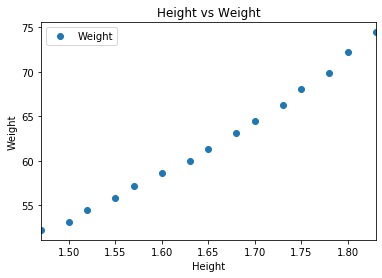

In [15]:
# plot the data and see how it looks
dataset.plot(x='Height', y='Weight', style='o')  
plt.title('Height vs Weight')  
plt.xlabel('Height')  
plt.ylabel('Weight')  
plt.show()

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

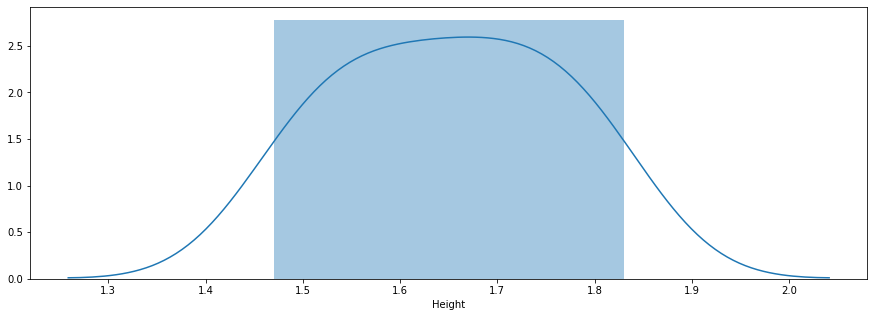

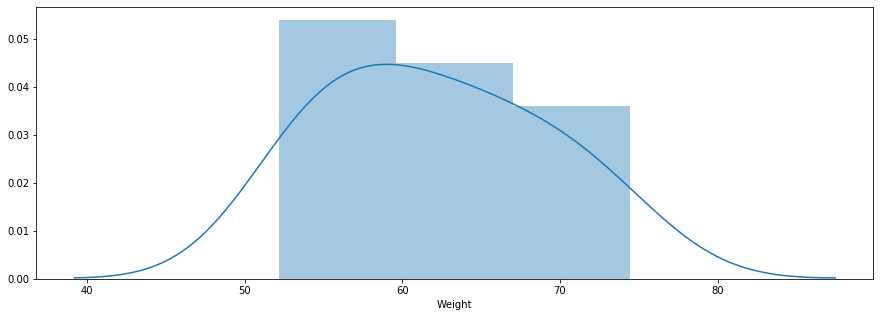

In [37]:
# seeing how the height in the data are distributed
plt.figure(figsize=(15,5))
plt.tight_layout()
seabornInstance.distplot(dataset['Height'])

# seeing how the weight in the data are distributed
plt.figure(figsize=(15,5))
plt.tight_layout()
seabornInstance.distplot(dataset['Weight'])

In [28]:
# Splitting our dataset into Dependent (target) and Independent Variables
X=dataset['Height'].values.reshape(-1,1)
y=dataset['Weight'].values.reshape(-1,1)


In [29]:
# Splitting the data into testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
# Creating a Linear Regressor and train the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-39.25676962]
[[61.45820729]]


In [32]:
# Predicting 
y_pred = regressor.predict(X_test)

In [33]:
# Comparing actual and predicted
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,53.12,52.930541
1,59.93,60.920108
2,63.11,63.993019


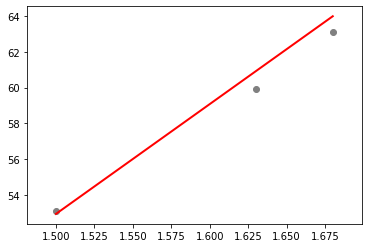

In [35]:
# difference between actual and predicted values
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [36]:
# Performance measure
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6875285251817639
Mean Squared Error: 0.5986436208283977
Root Mean Squared Error: 0.7737206348730773
